In [77]:
# Imports here
import pandas as pd
import numpy as np
import os

# Plotting
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches

# Kmeans
import sklearn
from sklearn.cluster import KMeans

# Agglomerative
import seaborn as sns; sns.set(color_codes=True) 

# Spectral
from sklearn.cluster import SpectralClustering

# Dimensionality Reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

%matplotlib inline

# Read features from .csv files

In [2]:
def readList(fn):
    data = pd.read_csv(fn, header=None)    
    return data.values.flatten().tolist()

In [3]:
def readTable(fn):
    data = pd.read_csv(fn, header=None)
    return data.values # returns a numpy array

In [4]:
def convertTableToList(tab):
    return tab.flatten().tolist()

In [93]:
cohortDir = "/home/jenna/Research/data/Preadolescents/"

siteClasses = []
fd = []
dvars = []
cr = []
mi = []
# dice = []

# Get sorted list of sites
sites = sorted([site.path for site in os.scandir(cohortDir) if site.is_dir()])
# for each site
for site in sites:
    # Get sorted list of subjects
    subjects = sorted([os.path.join(subj.path, "metrics") for subj in os.scandir(site) if os.path.exists(os.path.join(subj, 'metrics'))])
    print(site, len(subjects))
    siteClasses.extend(len(subjects)*[site.split("/")[-1]])
    # for subject in site
    for subject in subjects:
        print(len(readList(os.path.join(subject, "corrected_dag-displacement-metrics.csv"))))
        # read in FD
        fd.append(readList(os.path.join(subject, "corrected_dag-displacement-metrics.csv"))[:150])
        # read in DVARs
        dvars.append(readList(os.path.join(subject, "corrected_dag-intensity-metrics.csv"))[:150])
        # read in correlation ratio matrix
#         cr.append(convertTableToList(readTable(os.path.join(subject, "dag-correlation-matrix.csv")))[:150])
        # read in mutual information matrix (calculated using fsl)
#         mi.append(convertTableToList(readTable(os.path.join(subject, "dag-fsl-mi-matrix.csv")))[:150])
        

/home/jenna/Research/data/Preadolescents/BOSTON 9
470
470
470
470
470
470
470
470
470
/home/jenna/Research/data/Preadolescents/CCHMC 8
414
414
632
632
414
414
414
414
/home/jenna/Research/data/Preadolescents/CHLA 24
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
/home/jenna/Research/data/Preadolescents/CHOP 97
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
470
/home/jenna/Research/data/Preadolescents/COLUMBIA 6
470
470
470
470
470
470
/home/jenna/Research/data/Preadolescents/DUKE 10
150
150
150
150
150
150
150
150
150
150
/home/jenna/Research/data/Preadolescents/EMORY 11
150
150
150
150
150
150
150
150
150


# Data Preprocessing

In [48]:
# Convert the list of sites into a mapping dictionary
siteDict = {site:list(set(sorted(siteClasses))).index(site) for site in list(set(sorted(siteClasses)))}
siteDict

{'EMORY': 0,
 'CCHMC': 1,
 'MUSC': 2,
 'CHLA': 3,
 'BOSTON': 4,
 'UTAH': 5,
 'DUKE': 6,
 'COLUMBIA': 7,
 'CHOP': 8,
 'WISC': 9}

# Make figures (functions)

In [6]:
def viewDataList(y, yax="", title=""):
    fig = plt.figure()
    plt.plot(y)
    plt.xlabel("Image Volume Number")
    plt.ylabel(yax)
    plt.title(title)
    

In [71]:
def viewDataArray(data):
    sns.heatmap(data)

In [8]:
def performPCA(data):
    pca = PCA(n_components=2)
    components = pca.fit_transform(data)
    return components

In [9]:
def performTSNE(data):
    tsne = TSNE(n_components=2,
                init='random', 
                random_state=0)
    tsne_projected = tsne.fit_transform(data)
    return tsne_projected

In [10]:
def performUMAP(data):
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(data)
    return embedding

In [11]:
def showClusterResults(features, classes, title=""):
    fig = plt.figure()
    plt.scatter(features[:, 0], features[:, 1], c=classes, cmap='viridis')
    plt.title(title)
    plt.show()

# Unsupervised ML Functions

In [69]:
def agglomerativeClustering(data, classes):
    colors=[float(hash(c) % 256)/256 for c in classes]
    legend = [mpatches.Patch(color=cm.jet(float(hash(c) % 256)/256), label=c) for c in list(set(classes))]
    # sns.clustermap # https://seaborn.pydata.org/generated/seaborn.clustermap.html
    # cosine distance # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
    # linkage? # https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
    g = sns.clustermap(data,
                       col_cluster=False,
                       row_colors=cm.jet(colors),
                       cmap="jet") #, metric='cosine')
    l = g.ax_heatmap.legend(loc='center left', handles=legend, frameon=True)
    l.set_title(title='Site Key')

In [13]:
def kmeansClustering(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    y_pred = kmeans.predict(data)
    # Need to analyze results: how many subjects from each class are in each cluster
    return y_pred


In [84]:
def spectralClustering(data, k):
    spectral=SpectralClustering(n_clusters=k)
    y_pred = spectral.fit_predict(data)
    return y_pred

# Supervised ML Functions

In [15]:
def regression():
    pass

In [16]:
def svm():
    pass

In [17]:
def generateNN(): # lstm neural network
    pass

# Sandbox

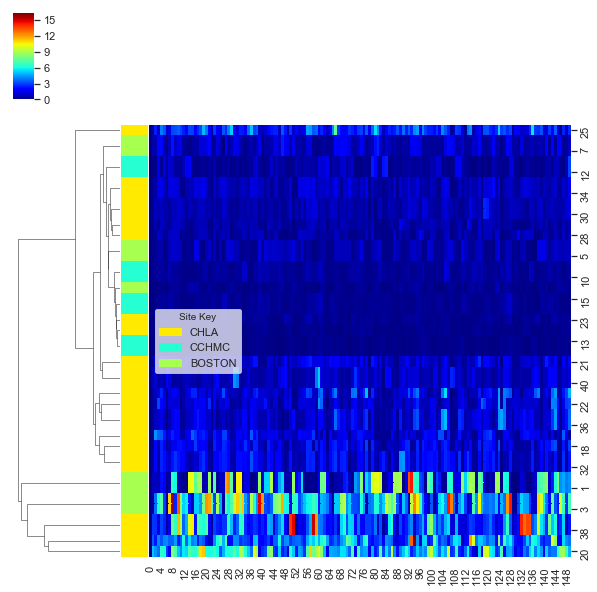

In [70]:
# Testing agglomerative clustering
agglomerativeClustering(fd[:41], siteClasses[:41])

In [72]:
# Testing k-means
y_kmeans, centers = kmeansClustering(fd[:41], 5)

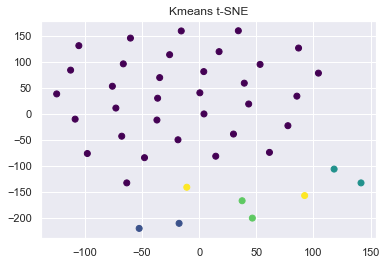

In [86]:
# Testing TSNE
tsne_features = performTSNE(fd[:41])
showClusterResults(tsne_features, y_kmeans, title="Kmeans t-SNE")

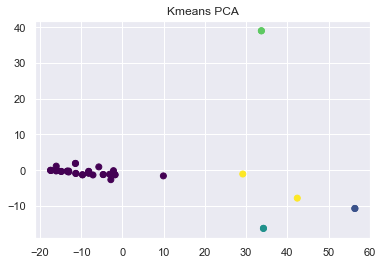

In [87]:
# Testing PCA
pca_features = performPCA(fd[:41])
showClusterResults(pca_features, y_kmeans, title='Kmeans PCA')

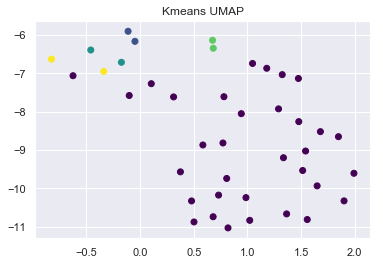

In [89]:
# Testing UMAP
umap_features = performUMAP(fd[:41])
showClusterResults(umap_features, y_kmeans, title='Kmeans UMAP')

In [85]:
# Testing k-means
y_spectral = spectralClustering(fd[:41], 5)

/home/jenna/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/jenna/anaconda3/lib/python3.7/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  n_init=n_init)


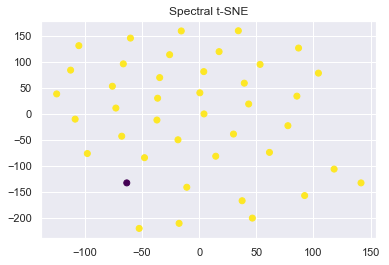

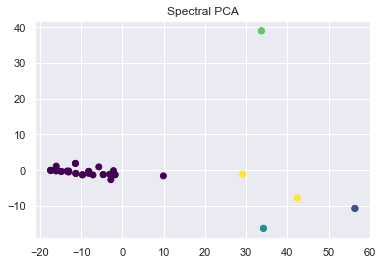

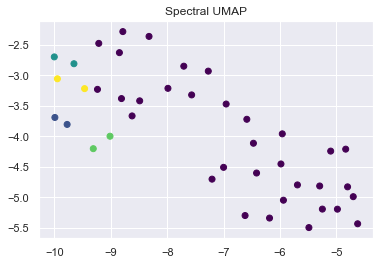

In [90]:
# Testing TSNE
tsne_features = performTSNE(fd[:41])
showClusterResults(tsne_features, y_spectral, title="Spectral t-SNE")

# Testing PCA
pca_features = performPCA(fd[:41])
showClusterResults(pca_features, y_kmeans, title='Spectral PCA')

# Testing UMAP
umap_features = performUMAP(fd[:41])
showClusterResults(umap_features, y_kmeans, title='Spectral UMAP')

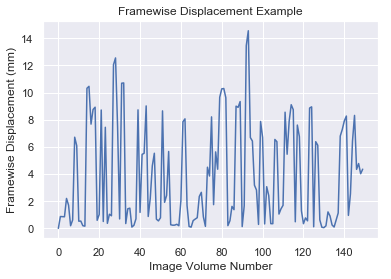

In [32]:
viewDataList(fd[0], 
             yax="Framewise Displacement (mm)",
             title="Framewise Displacement Example")

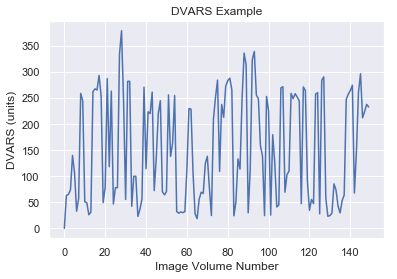

In [23]:
viewDataList(dvars[0], 
             yax="DVARS (units)",
             title="DVARS Example")

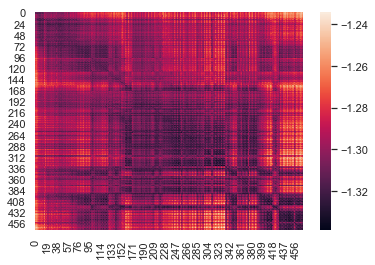

In [75]:
viewDataArray(readTable(os.path.join(subject, "dag-fsl-mi-matrix.csv")))

Text(0.5, 1.0, 'Voxel Signal')

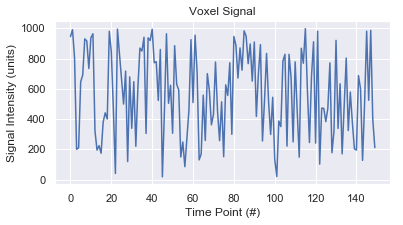

In [101]:
fig = plt.figure(figsize=(6,3))

plt.plot(np.random.randint(0, 1000, size=(150,)))
plt.xlabel("Time Point (#)")
plt.ylabel("Signal Intensity (units)")
plt.title("Voxel Signal")